# Data Science Incubator Project 5

## Imports and settings

In [11]:
# Python imports
import random as rn
import pickle

# Numerical imports
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# NLP packages
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec

# Plotting imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
sns.set()
sns.set_palette("colorblind")
sns.set_style("ticks")

# Seed randomness
rn.seed(0)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/walters_aj101/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data - and split (optional)

In [12]:
def split_data(sample_rate=1e-3) -> None:
    for split in ["test", "train"]:
        data = pd.read_csv(f"./data/{split}.csv", header=None, names=["rating", "title", "review"])
        data = data.sample(frac=sample_rate)
        data.to_csv(f"./data/{split}_sample.csv", index=False)

# split_data(sample_rate=1e-1)  # 10% of data
train = pd.read_csv("./data/train_sample.csv")
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
test = pd.read_csv("./data/test_sample.csv")
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)

display(train)
display(test)

,rating,title,review
0,5,breville,"I got it right before Xmas, so the shipment wa..."
1,2,Poor Quality. Great idea.,Length:: 0:15 MinsThe batch (10 in all) of toy...
2,2,Tempering the positives...,I wanted to write my own review to temper the ...
3,2,Bad Movie,"When I saw this movie I thought, ""How could an..."
4,2,marble,There are no instructions on how or different ...
...,...,...,...
299989,3,This album has nothing you would want to see.,If you want good music check out the previous ...
299990,4,"Great performance, easy to set up and use.",What's Hot:Cute design with great performance....
299991,1,"Can you say ""cheesy""?",I was hoping that with the glowing reviews tha...
299992,4,A welcome upgrade to Operation Flashpoint,"The Good : Beautiful scenery and graphics, hug..."


,rating,title,review
0,2,So What?,"What can I say about this book? Well, it's pro..."
1,5,Rock'n'Roll Shangri-La,These guys came out of nowhere with spine-ting...
2,1,Need to Be Able to Label Them Repeatedly,My little guy started taking 6 ounces at a tim...
3,4,Not too bad,I have owned these scissors for several months...
4,1,Guilty of making trash,"this is horrible, her latest single beat of my..."
...,...,...,...
64995,1,An unhappy customer,We bought this journal for our daughter's 8th ...
64996,1,Ignore this book,I have read numerous submarine novels by autho...
64997,3,Ba-Humbug,"Oh geez, Badu is soooooo annoyingly pretentiou..."
64998,1,Vocals?,Flaw and FBM would be OK if they had a lead si...


## Preprocess data

In [13]:
def preprocess_data():
    ps = PorterStemmer()
    
    corpus = []
    for index in range(len(train)):
        title = train.title[index]
        review = train.review[index]

        title = re.sub(r"[^a-zA-Z]", " ", title).lower().split()
        review = re.sub(r"[^a-zA-Z]", " ", review).lower().split()

        title = [ps.stem(word) for word in title if not word in set(stopwords.words("english"))]
        review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]

        corpus.append(" ".join(title + review))
    train["corpus"] = corpus
    
    corpus = []
    for index in range(len(test)):
        title = test.title[index]
        review = test.review[index]

        title = re.sub(r"[^a-zA-Z]", " ", title).lower().split()
        review = re.sub(r"[^a-zA-Z]", " ", review).lower().split()

        title = [ps.stem(word) for word in title if not word in set(stopwords.words("english"))]
        review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]

        corpus.append(" ".join(title + review))
    test["corpus"] = corpus
    
    train.to_csv("./data/train_sample_processed.csv", index=False)
    test.to_csv("./data/test_sample_processed.csv", index=False)

In [15]:
# preprocess_data()
train = pd.read_csv("./data/train_sample_processed.csv")
test = pd.read_csv("./data/test_sample_processed.csv")

## Partition data into X and Y

In [85]:
count_vectorizer = CountVectorizer(stop_words="english")
x = count_vectorizer.fit_transform(train.corpus)
y = train.rating

x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train classifier

BernoulliNB Model
              precision    recall  f1-score   support

           1       0.52      0.66      0.58     15075
           2       0.41      0.33      0.37     14852
           3       0.40      0.34      0.37     14789
           4       0.43      0.30      0.35     15215
           5       0.50      0.67      0.57     15068

    accuracy                           0.46     74999
   macro avg       0.45      0.46      0.45     74999
weighted avg       0.45      0.46      0.45     74999




,rating,count
0,1,19241
1,2,11825
2,3,12771
3,4,10852
4,5,20310


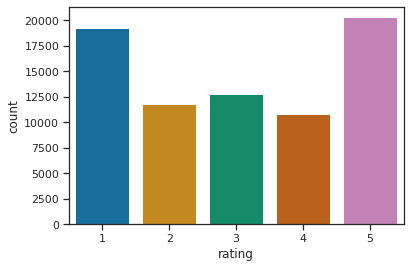

In [86]:
model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("BernoulliNB Model")
print(classification_report(y_test, y_pred))
print()
bnb = np.unique(y_pred, return_counts=True)
bnb = pd.DataFrame(bnb).T
bnb.columns = ['rating','count']
display(bnb)

plt.figure()
sns.barplot(x='rating', y='count', data=bnb)
plt.savefig('bnb', bbox_inches='tight')

MultinomialNB Model
              precision    recall  f1-score   support

           1       0.53      0.63      0.57     15075
           2       0.40      0.37      0.39     14852
           3       0.38      0.35      0.36     14789
           4       0.41      0.34      0.37     15215
           5       0.55      0.60      0.58     15068

    accuracy                           0.46     74999
   macro avg       0.45      0.46      0.45     74999
weighted avg       0.45      0.46      0.45     74999




,rating,count
0,1,17943
1,2,14065
2,3,13801
3,4,12703
4,5,16487


74999

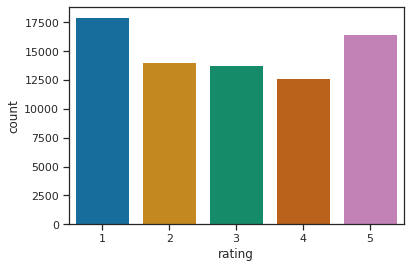

In [87]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("MultinomialNB Model")
print(classification_report(y_test, y_pred))
print()

mnb = np.unique(y_pred, return_counts=True)
mnb = pd.DataFrame(mnb).T
mnb.columns = ['rating','count']
display(mnb)

plt.figure()
sns.barplot(x='rating', y='count', data=mnb)
plt.savefig('mnb', bbox_inches='tight')

display(len(y_pred))

65000

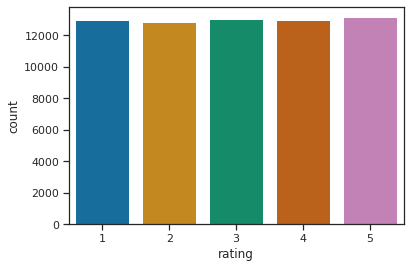

In [88]:
valcounts = pd.DataFrame(test.rating.value_counts())
ratings = [5,3,1,4,2]
valcounts['ratings'] = ratings
valcounts = valcounts[['ratings', 'rating']]
valcounts.columns = ['rating','count']
plt.figure()
sns.barplot(x='rating', y='count', data=valcounts)
plt.savefig('test_valcounts', bbox_inches='tight')

display(len(test))

299994

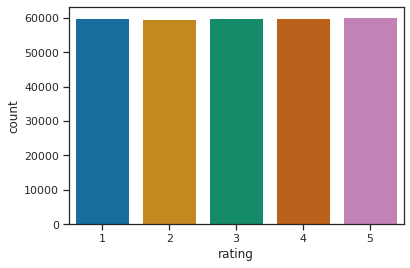

In [89]:
valcounts = pd.DataFrame(train.rating.value_counts())
ratings = [5,3,1,4,2]
valcounts['ratings'] = ratings
valcounts = valcounts[['ratings', 'rating']]
valcounts.columns = ['rating','count']
plt.figure()
sns.barplot(x='rating', y='count', data=valcounts)
plt.savefig('train_valcounts', bbox_inches='tight')

display(len(train))